<a href="https://colab.research.google.com/github/sumanthgubbala/Loan-Status-Prediction./blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dependencies

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#Data Collection and Data Pre-processing

In [37]:
df = pd.read_csv('/content/Loan.csv')

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
#Number of rows and columns
df.shape

(614, 13)

In [14]:
#Statistical Measure
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
#Number Of Missing Values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [38]:
#Droping Missing Values
df = df.dropna()

In [17]:
#Number Of Missing Values
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [39]:
#Label Encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-39-9bd882e473f1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [21]:
#Dependent Column Values
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [40]:
#Replacing the Values of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [23]:
#Dependent Column Values
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


#Data Visualization

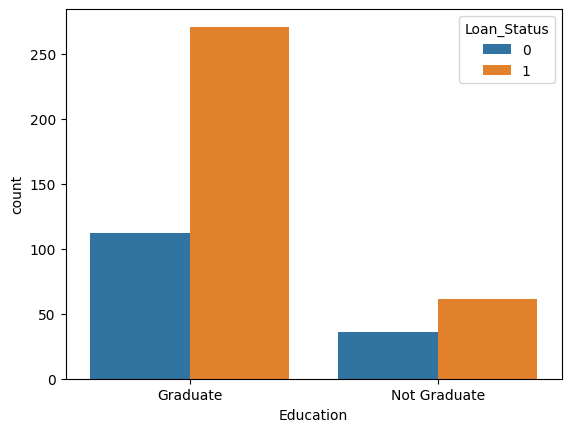

In [41]:
#Check Education and Loan Status
sns.countplot(x='Education',hue='Loan_Status', data=df)
plt.show()

<Axes: xlabel='Married', ylabel='count'>

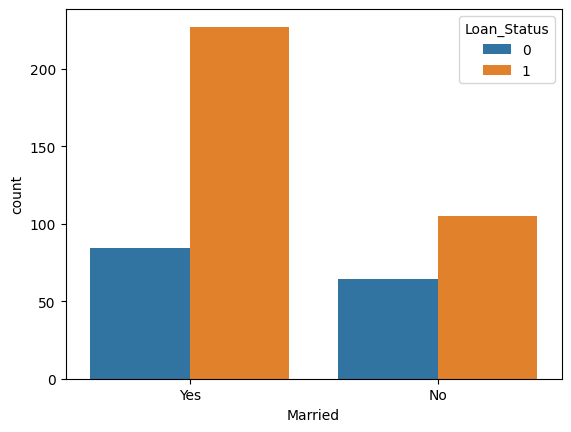

In [42]:
#Married and Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

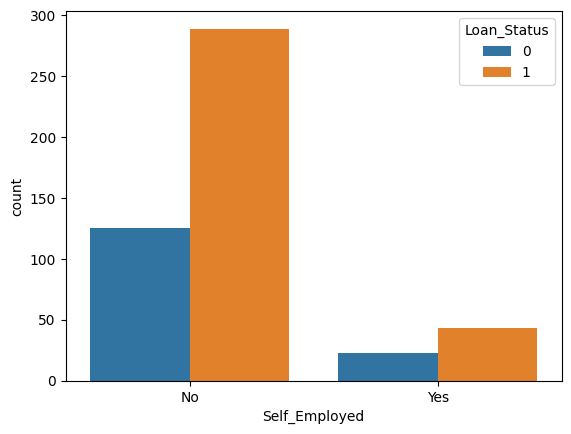

In [43]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

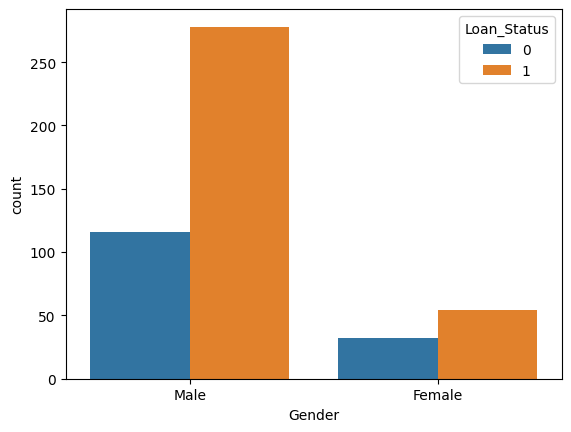

In [44]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

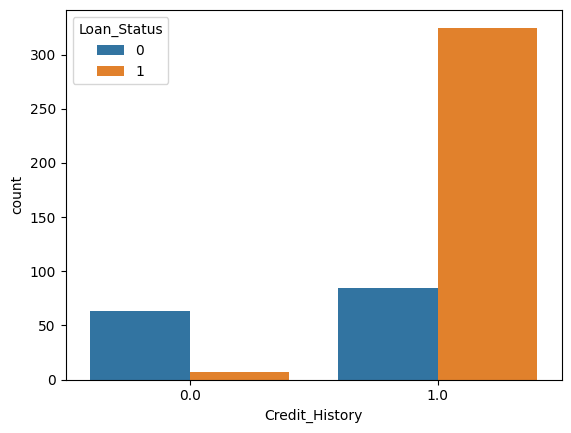

In [45]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

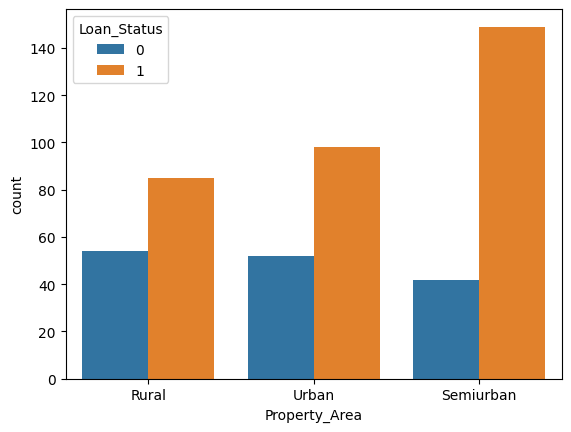

In [46]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

#Convert Categorical to Numerical Values

In [47]:
df.replace({'Married':{'No':0,'Yes':1},
            'Gender':{'Male':1,'Female':0},
            'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
            'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-47-024c9974fa85>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'No':0,'Yes':1},


In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


#Seprating the Data And Label

In [49]:
x = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y =df['Loan_Status']

In [53]:
print(x.head())

   Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1          1          1              0             4583   
2       1        1          0          1              1             3000   
3       1        1          0          0              0             2583   
4       1        0          0          1              0             6000   
5       1        1          2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  
1              0  
2              2  
3              2  
4              2  
5              2  


In [51]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


#Train and Test Split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

#Training The Model:


Support Vector Machine Model

In [55]:
classifier = svm.SVC(kernel='linear')

In [56]:
#Training the Model
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Scores

#Training Data

In [57]:
x_train_prediction = classifier.predict(x_train)

In [58]:
accuracy_training = accuracy_score(x_train_prediction,y_train)

In [59]:
print("Accuracy of Traning Data :",accuracy_training)

Accuracy of Traning Data : 0.7786458333333334


#Testing Data

In [60]:
x_test_prediction =classifier.predict(x_test)


In [61]:
accuracy_testing = accuracy_score(x_test_prediction,y_test)

In [62]:
print("Accuracy of Testing Data :",accuracy_testing)

Accuracy of Testing Data : 0.8125


#Making a Perdiction System

In [65]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
205,0,0,0,0,0,4408,0.0,120.0,360.0,1.0,1
549,1,1,0,1,0,2785,2016.0,110.0,360.0,1.0,0
513,1,1,0,1,0,2130,6666.0,70.0,180.0,1.0,1
415,0,0,0,1,0,2995,0.0,60.0,360.0,1.0,2
271,1,1,0,1,0,11146,0.0,136.0,360.0,1.0,2


In [68]:
x_test.loc[205].values

array([0, 0, '0', 0, 0, 4408, 0.0, 120.0, 360.0, 1.0, 1], dtype=object)

In [72]:
y_test

,Loan_Status
205,1
549,1
513,0
415,1
271,1
...,...
201,1
345,1
607,1
543,1


In [70]:
input_data =x_test.loc[205].values
input_data =input_data.reshape(1,-1)
prediction = classifier.predict(input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [71]:
prediction

array([1])

In [73]:
if prediction == 1:
  print("Loan is Approved")
else :
  print("Loan is not Approved")

Loan is Approved
